# UseCase 2: Predicting mental health.  

- Download the Depression Dataset (kaggle.com) from https://www.kaggle.com/datasets/anthonytherrien/depression-dataset/data.

## Question 1:

Use methods of your choice (e.g. exploratory data analysis, statistical methods, visualisations etc.)  to extract useful insights from the data. 



## Solution 1:

In [2]:
# Import the libraries.
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from IPython.display import display

c:\Users\abhis\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### a. Data Structure and Overview.

In [3]:
# Dataset path.
datasetpath = 'C:/Users/abhis/OneDrive/Documents/Abhishek_Documents/Professional/AXA/DS_Interview/UseCase_2/Datasets/depression_data.csv'

# Read and display 3 rows of the dataset.
dataset_df = pd.read_csv(datasetpath)
dataset_df.head(3)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No


#### a.1) Categorizing the Income and adding a column.

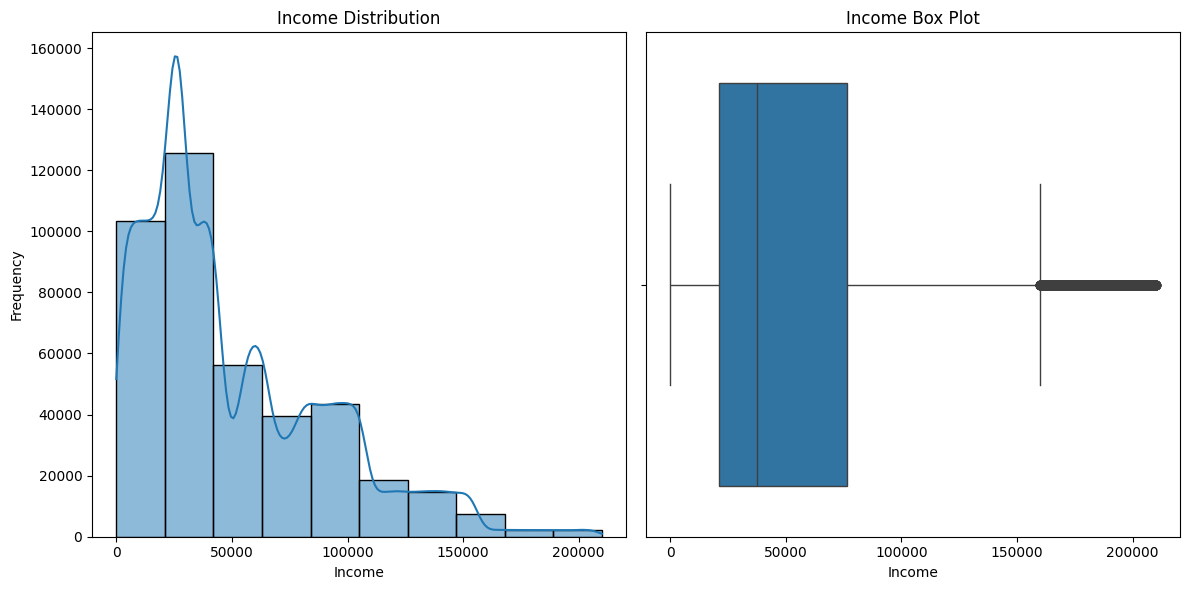

Summary Statistics for Income:
 count    413768.000000
mean      50661.707971
std       40624.100565
min           0.410000
25%       21001.030000
50%       37520.135000
75%       76616.300000
max      209995.220000
Name: Income, dtype: float64


In [4]:
# Step 1: Assess the Income column

# 1.1. Visualize the distribution of Income
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(dataset_df['Income'], bins=10, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=dataset_df['Income'])
plt.title('Income Box Plot')

plt.tight_layout()
plt.show()

# 1.2. Calculate summary statistics
income_stats = dataset_df['Income'].describe()
print("Summary Statistics for Income:\n", income_stats)

# Define income categories with hard-coded limits
def categorize_income_hardcoded(income):
    if income < 20000:  # Adjusted threshold for 'Very Low'
        return 'Very Low'
    elif 20000 <= income < 50000:  # Changed to start from 20000 for 'Low'
        return 'Low'
    elif 50000 <= income < 100000:  # Adjusted to make 'Medium' range larger
        return 'Medium'
    elif 100000 <= income < 150000:  # Adjusted to make 'High' range more specific
        return 'High'
    else:
        return 'Very High'  # Everything above 150000 is 'Very High'


# Apply the function to create a new column
dataset_df['Income Category'] = dataset_df['Income'].apply(categorize_income_hardcoded)


#### a.2) Categorizing the Age column and storing it in a new column.

In [5]:
# Define age categories with hard-coded limits
def categorize_age_hardcoded(age):
    if age < 18:
        return 'Underage'        # Age less than 18
    elif 18 <= age < 30:
        return 'Young Adult'     # Age from 18 to 29
    elif 30 <= age < 55:
        return 'Adult'           # Age from 30 to 55
    else:
        return 'Senior'          # Age 55 and above

# Apply the categorize function to the Age column
dataset_df['Age Category'] = dataset_df['Age'].apply(categorize_age_hardcoded)

In [6]:
# Check for missing values
print('\nCheck for missing values\n\n')
print(dataset_df.isnull().sum())



Check for missing values


Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
Income Category                 0
Age Category                    0
dtype: int64


In [7]:
# Data types
print('\nDisplaying the data types of the columns:\n\n')
print(dataset_df.dtypes)


Displaying the data types of the columns:


Name                             object
Age                               int64
Marital Status                   object
Education Level                  object
Number of Children                int64
Smoking Status                   object
Physical Activity Level          object
Employment Status                object
Income                          float64
Alcohol Consumption              object
Dietary Habits                   object
Sleep Patterns                   object
History of Mental Illness        object
History of Substance Abuse       object
Family History of Depression     object
Chronic Medical Conditions       object
Income Category                  object
Age Category                     object
dtype: object


### b. Distribution of Age and Income.

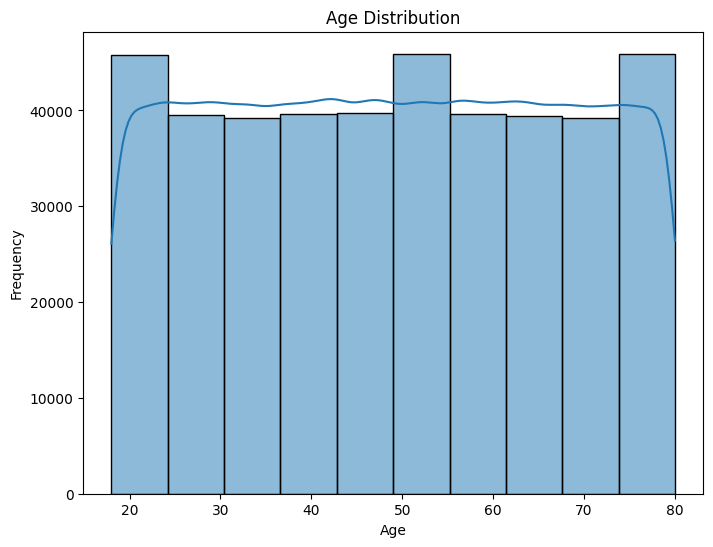

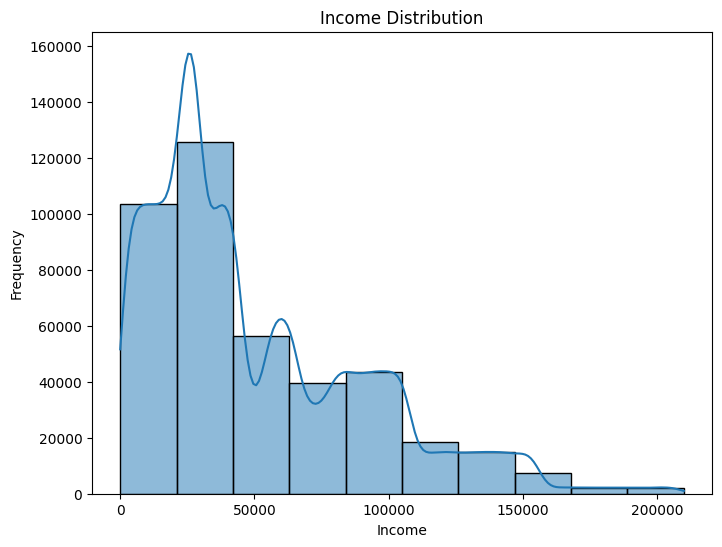

In [8]:
# Distribution of Age
plt.figure(figsize=(8,6))
sns.histplot(dataset_df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Income
plt.figure(figsize=(8,6))
sns.histplot(dataset_df['Income'], bins=10, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()




### c. Correlation analysis.

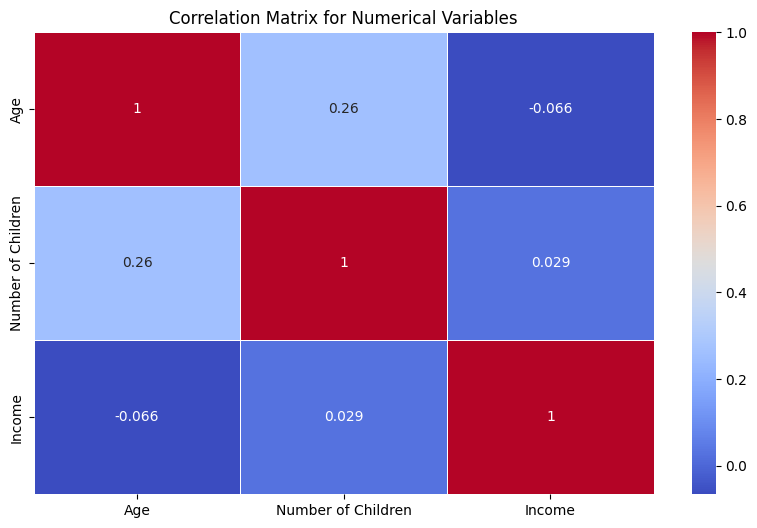

In [9]:
# Select only numerical columns for correlation analysis
numerical_df = dataset_df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for numerical data
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Variables')
plt.show()


### d. Cross tabulation and grouped analysis.

C:\Users\abhis\AppData\Local\Temp\ipykernel_29264\1502304843.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='History of Mental Illness', data=dataset_df, palette='Set2')


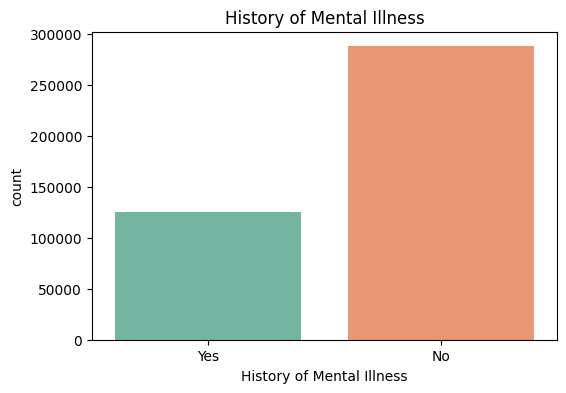

In [10]:
# Count plot for History of Mental Illness
plt.figure(figsize=(6,4))
sns.countplot(x='History of Mental Illness', data=dataset_df, palette='Set2')
plt.title('History of Mental Illness')
plt.show()



### e. Multivariate Analysis: Mental Health and Employment

In [11]:
# Bar plot for variable vs Mental Illness
def multivariate_MentalAnalysis(df, column):
    
    # Bool to see if null hypothesis is rejected. later on.
    isSignificant = False

    # Cross-tabulation for column variable and Mental Illness
    print('\n\n')
    cross_tab = pd.crosstab(df[column], df['History of Mental Illness'], margins=True)
    cross_tab_copy = cross_tab.copy()


    # Calculate the ratio of people with Mental Illness = Yes
    cross_tab['Mental_Illness_Yes_(%)'] = (cross_tab['Yes'] / cross_tab['All']) * 100
    
    display(cross_tab)
    print('\n\n')

    # Plot the figure
    plt.figure(figsize=(14,4))
    sns.countplot(x=column, hue='History of Mental Illness', data=df, palette='Set2')
    plt.title(column + ' vs Mental Illness')
    plt.show()


    # Perform chi-squared analysis and compute p-value.    
    # Copying the dataset and removing high-cardinality columns like 'Name'
    # df = dataset_df.drop(['Name'], axis=1)

    # Perform the chi-square test
    chi2_stat, p_val, dof, expected = stats.chi2_contingency(cross_tab_copy)

    print("Chi-Square Test:")
    print(f"Chi-Square Statistic: {chi2_stat}")
    print(f"Degrees of Freedom: {dof}")
    print(f"P-value: {p_val}")

    # Interpretation
    alpha = 0.00005  # significance level
    if p_val < alpha:
        print("Result: Significant association between Alcohol Consumption and History of Mental Illness (reject null hypothesis)")
        isSignificant = True
    else:
        print("Result: No significant association (fail to reject null hypothesis)")

    # Return the isSignificant flag.
    return isSignificant




Multi variate Analysis for the column: Age





History of Mental Illness,No,Yes,All,Mental_Illness_Yes_(%)
Age,,,,
18,4395,2075,6470,32.071097
19,4528,2060,6588,31.268974
20,4572,1938,6510,29.769585
21,4417,1964,6381,30.778875
22,4611,1980,6591,30.040965
...,...,...,...,...
77,4436,2060,6496,31.711823
78,4501,2030,6531,31.082529
79,4493,2144,6637,32.303752


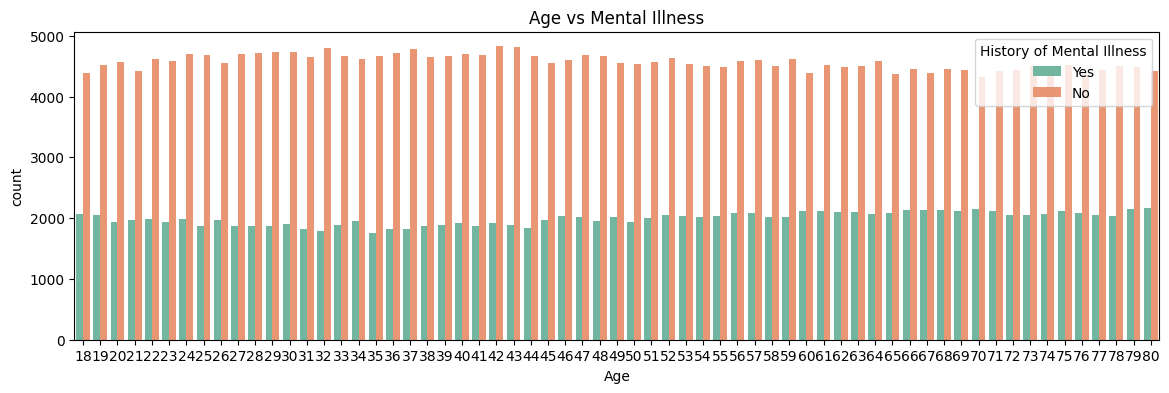

Chi-Square Test:
Chi-Square Statistic: 500.67142242076307
Degrees of Freedom: 126
P-value: 4.110946338862388e-46
Result: Significant association between Alcohol Consumption and History of Mental Illness (reject null hypothesis)


Multi variate Analysis for the column: Marital Status





History of Mental Illness,No,Yes,All,Mental_Illness_Yes_(%)
Marital Status,,,,
Divorced,23111,9618,32729,29.386782
Married,167155,73289,240444,30.480694
Single,50690,21420,72110,29.704618
Widowed,46987,21498,68485,31.390816
All,287943,125825,413768,30.409553


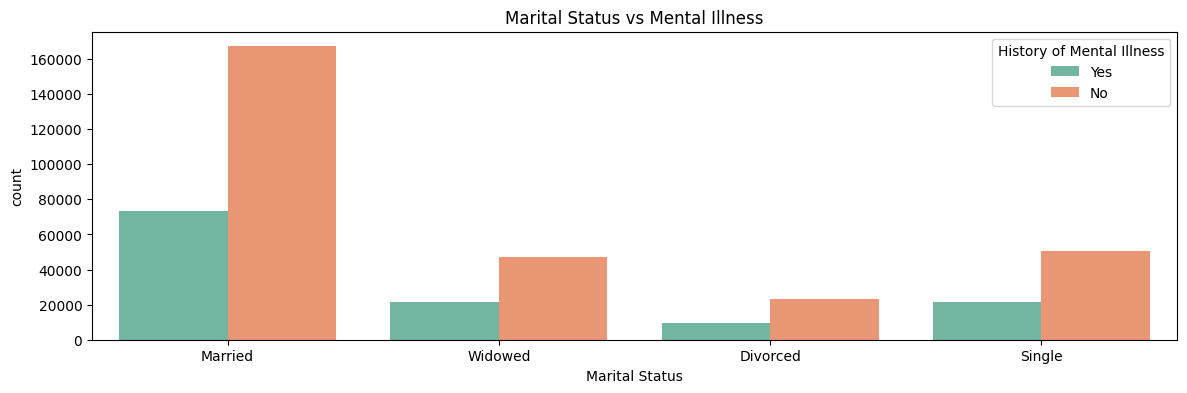

Chi-Square Test:
Chi-Square Statistic: 64.84684614908466
Degrees of Freedom: 8
P-value: 5.174587342275629e-11
Result: Significant association between Alcohol Consumption and History of Mental Illness (reject null hypothesis)


Multi variate Analysis for the column: Education Level





History of Mental Illness,No,Yes,All,Mental_Illness_Yes_(%)
Education Level,,,,
Associate Degree,53324,26675,79999,33.344167
Bachelor's Degree,89845,34484,124329,27.736087
High School,79583,39344,118927,33.082479
Master's Degree,53111,20657,73768,28.002657
PhD,12080,4665,16745,27.859062
All,287943,125825,413768,30.409553


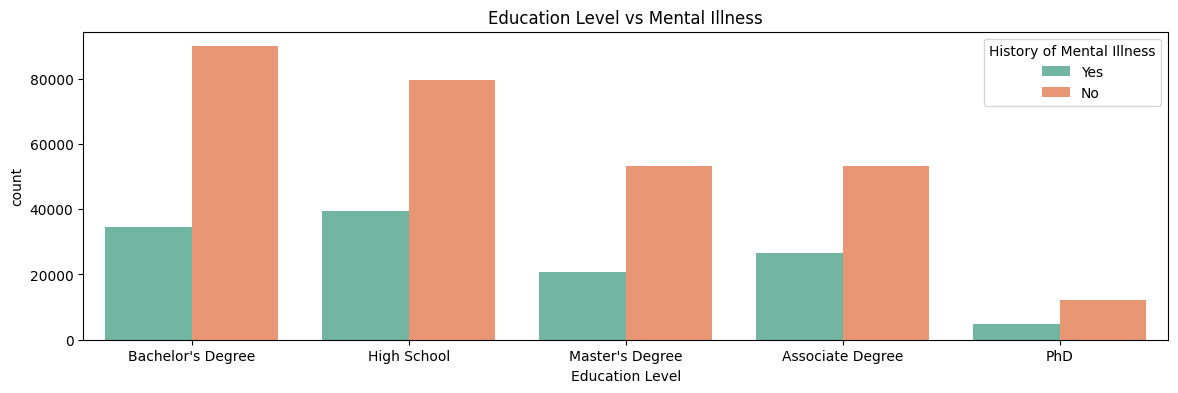

Chi-Square Test:
Chi-Square Statistic: 1400.3934320834205
Degrees of Freedom: 10
P-value: 8.157996943827289e-295
Result: Significant association between Alcohol Consumption and History of Mental Illness (reject null hypothesis)


Multi variate Analysis for the column: Number of Children





History of Mental Illness,No,Yes,All,Mental_Illness_Yes_(%)
Number of Children,,,,
0,108501,46731,155232,30.103973
1,58304,25621,83925,30.528448
2,58115,25846,83961,30.783340
3,53235,23739,76974,30.840284
4,9788,3888,13676,28.429365
All,287943,125825,413768,30.409553


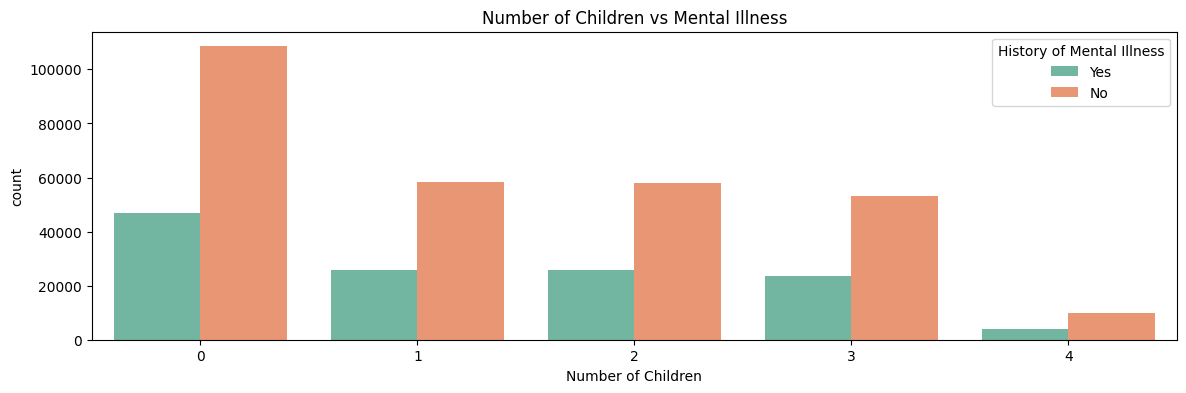

Chi-Square Test:
Chi-Square Statistic: 45.04220744816128
Degrees of Freedom: 10
P-value: 2.1369274704913144e-06
Result: Significant association between Alcohol Consumption and History of Mental Illness (reject null hypothesis)


Multi variate Analysis for the column: Smoking Status





History of Mental Illness,No,Yes,All,Mental_Illness_Yes_(%)
Smoking Status,,,,
Current,35174,14994,50168,29.887578
Former,81031,35153,116184,30.256318
Non-smoker,171738,75678,247416,30.587351
All,287943,125825,413768,30.409553


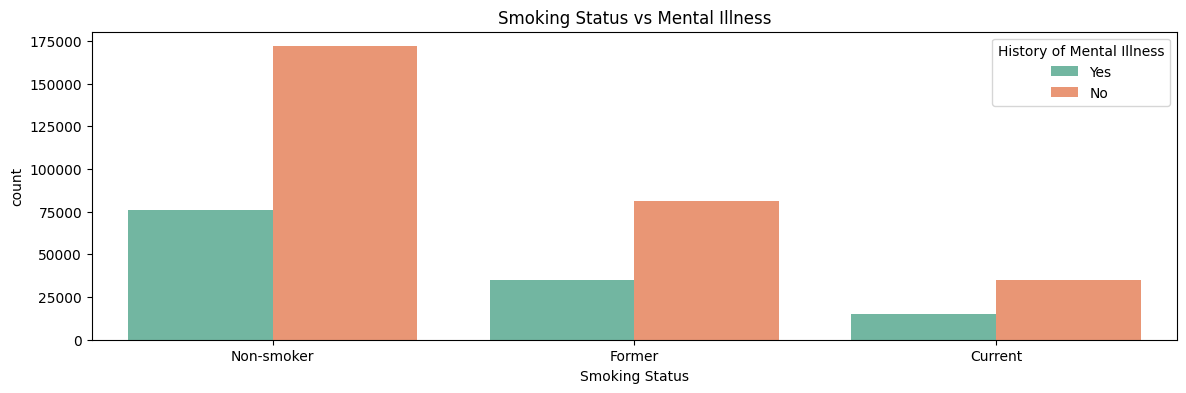

Chi-Square Test:
Chi-Square Statistic: 11.444087927498837
Degrees of Freedom: 6
P-value: 0.07558351101869512
Result: No significant association (fail to reject null hypothesis)


Multi variate Analysis for the column: Physical Activity Level





History of Mental Illness,No,Yes,All,Mental_Illness_Yes_(%)
Physical Activity Level,,,,
Active,55424,23481,78905,29.758570
Moderate,110157,47856,158013,30.286116
Sedentary,122362,54488,176850,30.810291
All,287943,125825,413768,30.409553


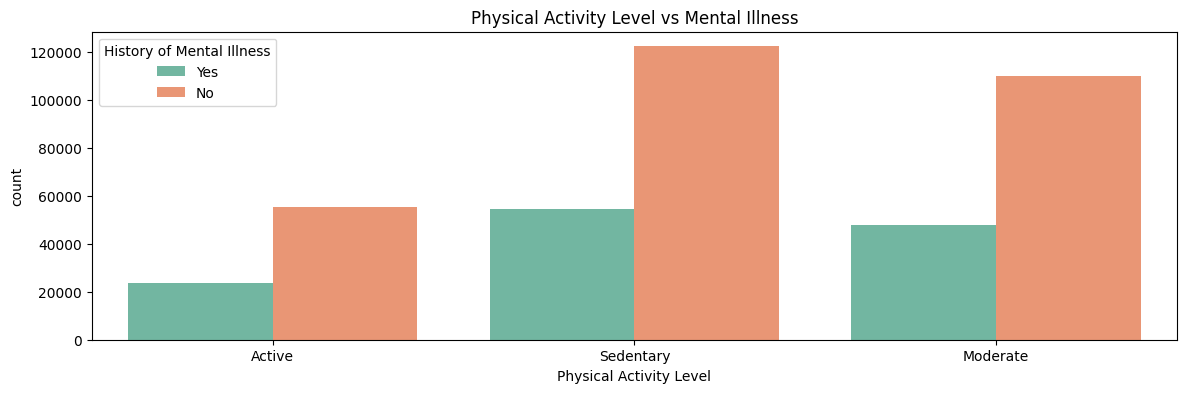

Chi-Square Test:
Chi-Square Statistic: 30.359103695976955
Degrees of Freedom: 6
P-value: 3.3586382783323904e-05
Result: Significant association between Alcohol Consumption and History of Mental Illness (reject null hypothesis)


Multi variate Analysis for the column: Employment Status





History of Mental Illness,No,Yes,All,Mental_Illness_Yes_(%)
Employment Status,,,,
Employed,197718,67941,265659,25.574515
Unemployed,90225,57884,148109,39.082027
All,287943,125825,413768,30.409553


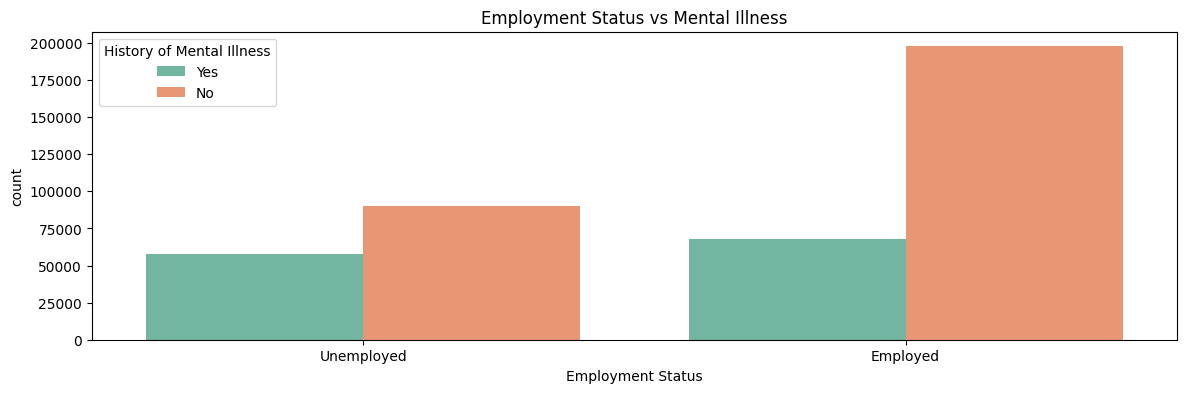

Chi-Square Test:
Chi-Square Statistic: 8198.609285236696
Degrees of Freedom: 4
P-value: 0.0
Result: Significant association between Alcohol Consumption and History of Mental Illness (reject null hypothesis)


Multi variate Analysis for the column: Alcohol Consumption





History of Mental Illness,No,Yes,All,Mental_Illness_Yes_(%)
Alcohol Consumption,,,,
High,69244,31834,101078,31.494489
Low,97217,42033,139250,30.185278
Moderate,121482,51958,173440,29.957334
All,287943,125825,413768,30.409553


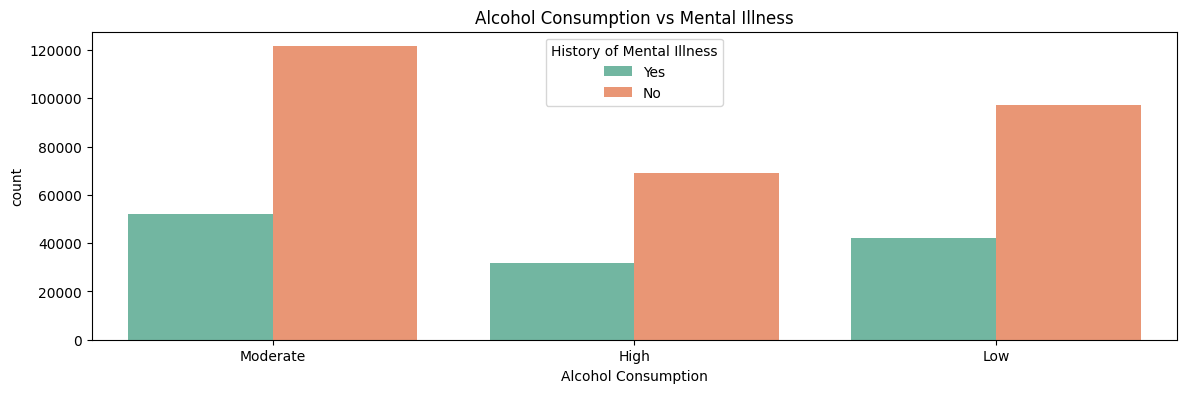

Chi-Square Test:
Chi-Square Statistic: 76.2921736165222
Degrees of Freedom: 6
P-value: 2.0796728377428682e-14
Result: Significant association between Alcohol Consumption and History of Mental Illness (reject null hypothesis)


Multi variate Analysis for the column: Dietary Habits





History of Mental Illness,No,Yes,All,Mental_Illness_Yes_(%)
Dietary Habits,,,,
Healthy,52514,19991,72505,27.571892
Moderate,118295,52151,170446,30.596787
Unhealthy,117134,53683,170817,31.427200
All,287943,125825,413768,30.409553


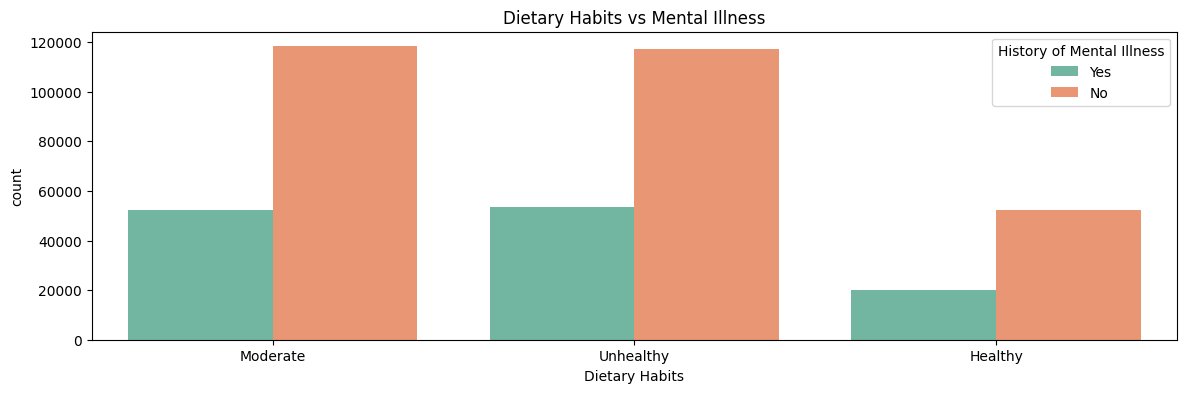

Chi-Square Test:
Chi-Square Statistic: 362.3015989567789
Degrees of Freedom: 6
P-value: 3.524135929758325e-75
Result: Significant association between Alcohol Consumption and History of Mental Illness (reject null hypothesis)


Multi variate Analysis for the column: Sleep Patterns





History of Mental Illness,No,Yes,All,Mental_Illness_Yes_(%)
Sleep Patterns,,,,
Fair,137049,59740,196789,30.357388
Good,63334,24063,87397,27.532982
Poor,87560,42022,129582,32.428887
All,287943,125825,413768,30.409553


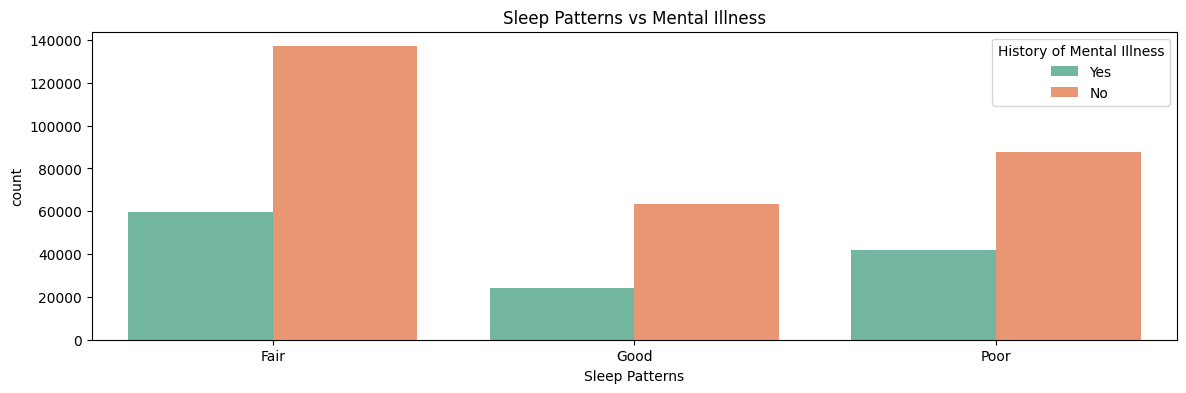

Chi-Square Test:
Chi-Square Statistic: 591.6762682229571
Degrees of Freedom: 6
P-value: 1.4559455654713063e-124
Result: Significant association between Alcohol Consumption and History of Mental Illness (reject null hypothesis)


Multi variate Analysis for the column: History of Mental Illness





History of Mental Illness,No,Yes,All,Mental_Illness_Yes_(%)
History of Mental Illness,,,,
No,287943,0,287943,0.000000
Yes,0,125825,125825,100.000000
All,287943,125825,413768,30.409553


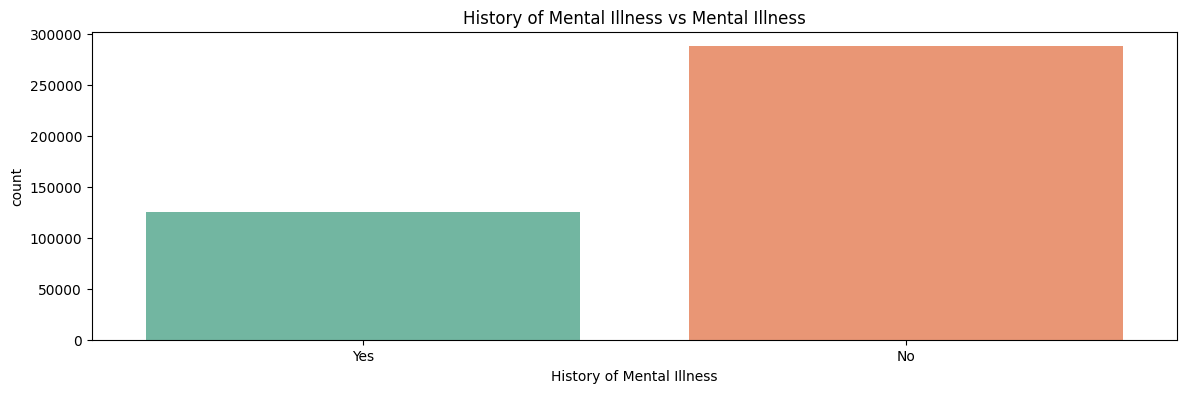

Chi-Square Test:
Chi-Square Statistic: 413768.00000000006
Degrees of Freedom: 4
P-value: 0.0
Result: Significant association between Alcohol Consumption and History of Mental Illness (reject null hypothesis)


Multi variate Analysis for the column: History of Substance Abuse





History of Mental Illness,No,Yes,All,Mental_Illness_Yes_(%)
History of Substance Abuse,,,,
No,198402,86478,284880,30.355939
Yes,89541,39347,128888,30.528055
All,287943,125825,413768,30.409553


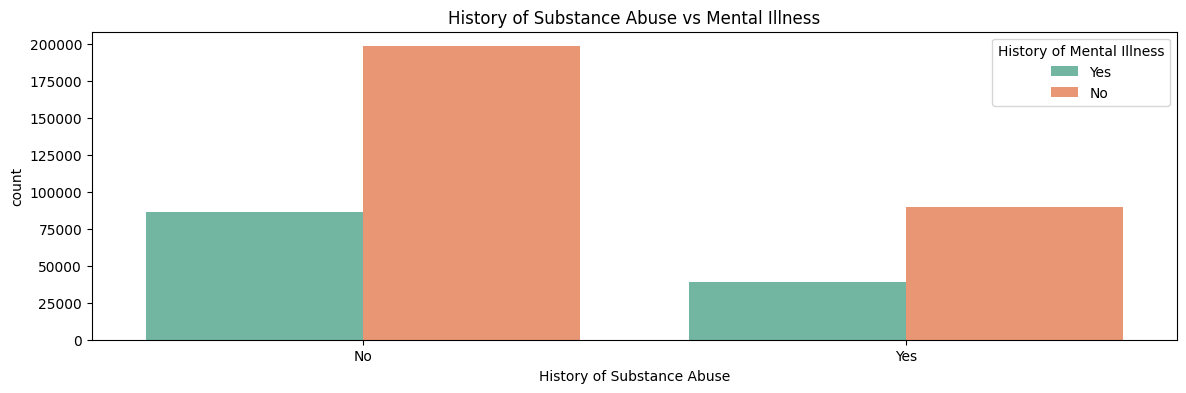

Chi-Square Test:
Chi-Square Statistic: 1.2422256323896628
Degrees of Freedom: 4
P-value: 0.8710987098668348
Result: No significant association (fail to reject null hypothesis)


Multi variate Analysis for the column: Family History of Depression





History of Mental Illness,No,Yes,All,Mental_Illness_Yes_(%)
Family History of Depression,,,,
No,210934,91581,302515,30.273210
Yes,77009,34244,111253,30.780294
All,287943,125825,413768,30.409553


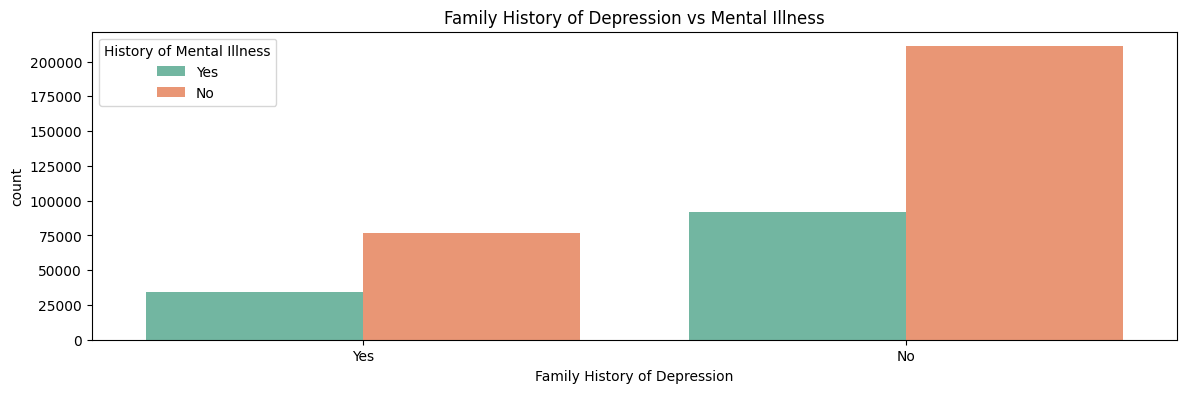

Chi-Square Test:
Chi-Square Statistic: 9.88329703237268
Degrees of Freedom: 4
P-value: 0.042440087931455005
Result: No significant association (fail to reject null hypothesis)


Multi variate Analysis for the column: Chronic Medical Conditions





History of Mental Illness,No,Yes,All,Mental_Illness_Yes_(%)
Chronic Medical Conditions,,,,
No,193696,83865,277561,30.214980
Yes,94247,41960,136207,30.806053
All,287943,125825,413768,30.409553


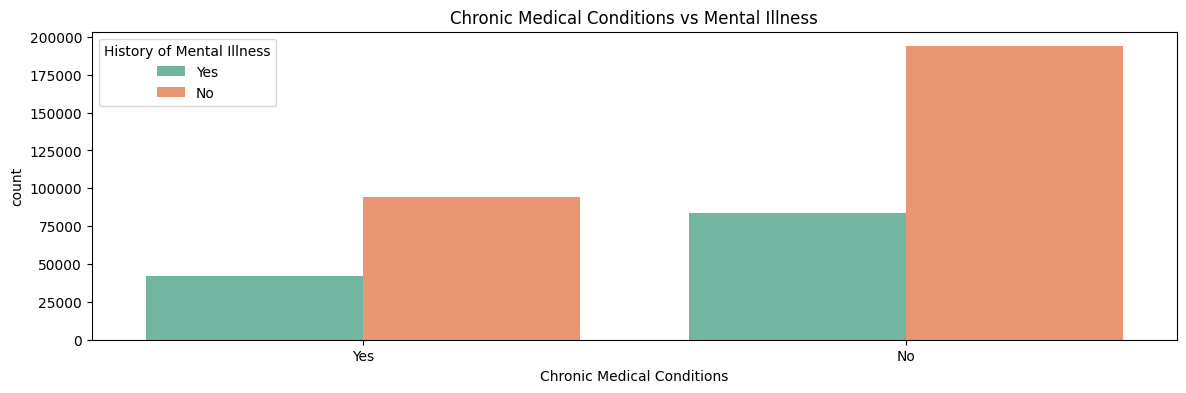

Chi-Square Test:
Chi-Square Statistic: 15.08423291350952
Degrees of Freedom: 4
P-value: 0.004529663381359344
Result: No significant association (fail to reject null hypothesis)


Multi variate Analysis for the column: Income Category





History of Mental Illness,No,Yes,All,Mental_Illness_Yes_(%)
Income Category,,,,
High,36108,9714,45822,21.199424
Low,102766,50698,153464,33.035761
Medium,81299,24936,106235,23.472490
Very High,7726,2086,9812,21.259682
Very Low,60044,38391,98435,39.001371
All,287943,125825,413768,30.409553


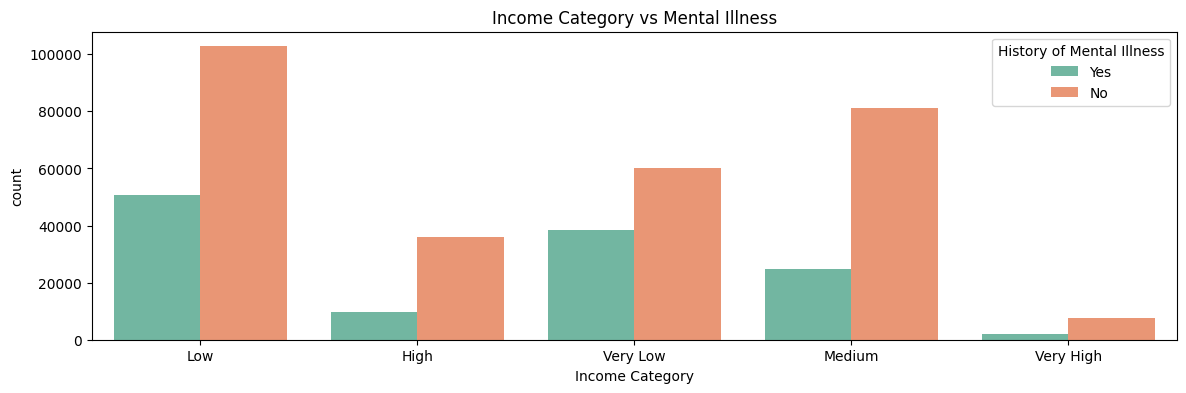

Chi-Square Test:
Chi-Square Statistic: 8574.534918517511
Degrees of Freedom: 10
P-value: 0.0
Result: Significant association between Alcohol Consumption and History of Mental Illness (reject null hypothesis)


Multi variate Analysis for the column: Age Category





History of Mental Illness,No,Yes,All,Mental_Illness_Yes_(%)
Age Category,,,,
Adult,116515,47992,164507,29.173227
Senior,116222,54424,170646,31.892925
Young Adult,55206,23409,78615,29.776760
All,287943,125825,413768,30.409553


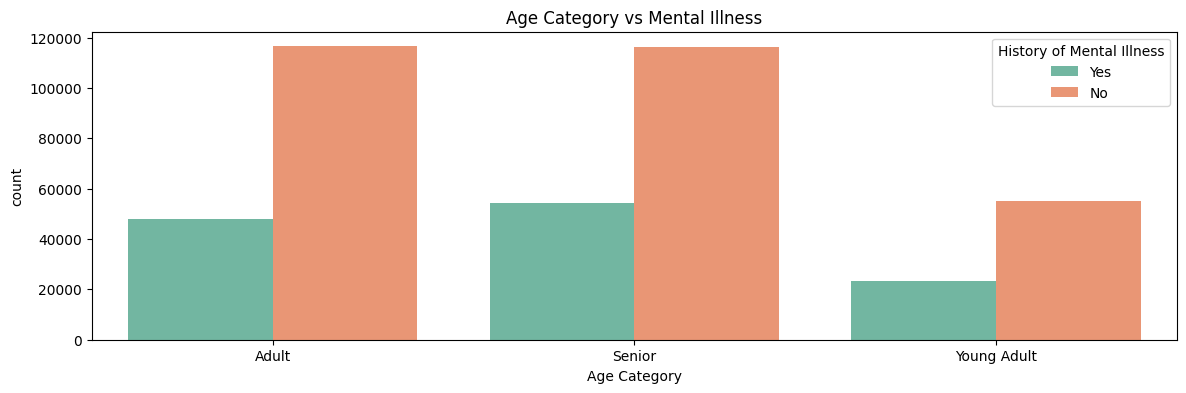

Chi-Square Test:
Chi-Square Statistic: 311.12958252589635
Degrees of Freedom: 6
P-value: 3.368569436572669e-64
Result: Significant association between Alcohol Consumption and History of Mental Illness (reject null hypothesis)


List of columns with Significant p-values:

Age
Marital Status
Education Level
Number of Children
Physical Activity Level
Employment Status
Alcohol Consumption
Dietary Habits
Sleep Patterns
History of Mental Illness
Income Category
Age Category


In [12]:
# Declaring an empty list to fill with columns with Significant p-values.
isSignificant_list = []

# Looping through the columns and plotting.
for column in dataset_df.columns:
    
    # Ensuring the Name column doesn't get plotted thereby preventing the total destruction of the RAM this is being ran on. :-P
    if column != 'Name' and column != 'Income':
        
        print('\n\nMulti variate Analysis for the column: ' + column)
        
        # Making plots and checking if the p-value is significant.
        isSignificant = multivariate_MentalAnalysis(dataset_df, column)

        if isSignificant == True:
            isSignificant_list.append(column)


# Print the sigfnificant list.
print('\n\nList of columns with Significant p-values:\n')
for value in isSignificant_list:
    print(value)

        


## Question 2:

Use suitable models to predict if an individual will suffer mental illness (variable titled “History of Mental Illness”) using all or some of the other variables present in the data.

Your answer should also contain:

- 1) Narratives for including/excluding variables of choice;
- 2) Narrative supporting the model/s of choice,
- 3) An assessment of model performance,
- 4) Assessment of potential model biases.



## Solution 2

- 1) Narratives for including/excluding variables of choice:
    - Answer: The following variables have been selected based on the cross tabulation analysis where sub classes have shown to have a relatively significant impact on the occurence of mental health illness:
    (This has also been visualized in the python notebook 'UseCase_2_Code.ipynb'.)
        - Sleep Patterns
        - Education level
        - Dietary Habits
        - Employment Status
        - Income Category
    
    - The following have been selected purely on grounds of common sense and real life observations:
        - Alcohol Consumption
        - Family History of Depression
        - Age Category  

- 2) Narrative supporting the model/s of choice:
    - Answer: The following models have been selected (along with the reasoning):
        - Logistic Regression:
            - Provides a fast and linear method to classify.
            - Simple and effective, this is further proven by the resulting confusion matrix, precision, accuracy and f1-scores.
            - It has in-built class balancing features that has been leveraged here to offset the class imbalance in the dataset.
        - Decision Tree:
            - These are non-linear and help model complicated relationships without the need to feature-scale.
            - Provide for a way to class balance.
        - Random Forest:
            - These utilize multiple decision trees and average their predictions.
            - Sometimes much better than decision trees where overfitting can be an issue in Decision-trees.
            - Has in-built class balancing feature.
            - Good model for medium to large datasets.
        - K-Nearest Neighbors:
            - This model is good at identifying patterns.
            - Predictions can be formed based on the clusters it falls under.
        - Extra Trees:
            - Similar to Random Forest, but includes randomness in node splittiong.
            - The added randomness could improve generalization by reducting variance.
            - Class balancing is available. 

- 3) An assessment of model performance:
    - Answer: Based on the following table, I conclude the following:
        - If predicting both 'Yes' and 'No' are important. Logisic Regression has a more balanced performance in terms of being suitable at predicting both 'Yes' and 'No' class. This can be inferred by the confusion matrix and the F1-scores.
        - If predicting 'Yes' is more important. The decision trees (all 3 variants) perform similarly and appear to be the best in terms of prediciting the 'Yes' class of the 'History of mental illness'.
        - If predicting 'No; is more important. The KNN model achieves better performance in predicting the 'No' class of the 'History of mental illness'. This can be inferred by the model's F1-Score, precision and recall for the 'No' class.  

        - Summary table:   


        | Model                 | Class | Accuracy | Precision | Recall   | F1-Score |
        |-----------------------|-------|----------|-----------|----------|----------|
        | Logistic Regression   | No    | 0.590747 | 0.752627  | 0.617874 | 0.678626 |
        | Logistic Regression   | Yes   | 0.590747 | 0.372520  | 0.527651 | 0.436718 |
        | Decision Tree         | No    | 0.568405 | 0.754695  | 0.567210 | 0.647657 |
        | Decision Tree         | Yes   | 0.568405 | 0.362012  | 0.571185 | 0.443156 |
        | Random Forest         | No    | 0.571528 | 0.753291  | 0.575933 | 0.652780 |
        | Random Forest         | Yes   | 0.571528 | 0.362675  | 0.561282 | 0.440633 |
        | K-Nearest Neighbors   | No    | 0.642766 | 0.708844  | 0.830163 | 0.764722 |
        | K-Nearest Neighbors   | Yes   | 0.642766 | 0.343732  | 0.206900 | 0.258314 |
        | Extra Trees           | No    | 0.568434 | 0.754718  | 0.567238 | 0.647684 |
        | Extra Trees           | Yes   | 0.568434 | 0.362039  | 0.571217 | 0.443186 |   


- 4) Assessment of potential model biases:
    - Answer. The following model biases could potentially affect the outcome:
        - Class Imbalance Bias:
            Inspite of class balancing, there could possibly be some residual class imbalance issues due to the nature of the dataset.
        - Featue representation bias:
            Usage of One-hot encoding could potentially introduce over-representation of certain features. This needs to be carefully balanced to avoid skewing predictions.
        - Socioeconomic Bias:
            - Features such as Employment Status, Income Category and Education level could indirectly introduce socioeconomic status. Because they could possibly be related and a consequence of each other.
            - In plain terms, this could train the model to infer that every individual with lower socioeconomic status is predisposed to mental illness, thereby perpetuating untrue sterotypes.
        - Evaluation Bias:
            - Relying on multiple metrics apart from just the accuracy is helpful.
        - Model's inherent Bias:
            - KNN could perform differently based on the data density
            - Logistic Regression might not be considering the complex relationships due to its linear nature.
            - Decision Tree models: These could result in over-fitting due to their sensitivity to features.








### a. Run the models and Calculate Confusion Matrix

In [56]:
# Function to calculate and return confusion matrix with y_test and y_pred.
def calculate_confusionMatrix(y_test, y_pred):
    '''
    Function to calculate and return confusion matrix with y_test and y_pred.
    '''
    
    # total count of y_test
    total_samples = len(y_test)

    # Initialize confusion matrix counters
    true_positive = 0  # Predicted Yes, Actual Yes
    true_negative = 0  # Predicted No, Actual No
    false_positive = 0  # Predicted Yes, Actual No
    false_negative = 0  # Predicted No, Actual Yes

    # Calculate the counts for each cell in the confusion matrix
    for actual, predicted in zip(y_test, y_pred):
        if actual == 'Yes' and predicted == 'Yes':
            true_positive += 1
        elif actual == 'No' and predicted == 'No':
            true_negative += 1
        elif actual == 'No' and predicted == 'Yes':
            false_positive += 1
        elif actual == 'Yes' and predicted == 'No':
            false_negative += 1


    # Calculate proportions by dividing each count by the total number of samples
    confusion_matrix_total_sample = {
        'Actual Yes': {
            'Predicted Yes': true_positive / total_samples,
            'Predicted No': false_negative / total_samples
        },
        'Actual No': {
            'Predicted Yes': false_positive / total_samples,
            'Predicted No': true_negative / total_samples
        }
    }

    # Convert to a DataFrame for better readability
    confusion_matrix_df = pd.DataFrame(confusion_matrix_total_sample)

    # return the confusion matrix.
    return confusion_matrix_df.round(2)


In [70]:
# Assuming your data is in a DataFrame named 'dataset_df'
df = dataset_df.copy()

# Preprocess the data (handle missing values, categorical features, etc.)
# Let's include more relevant columns for prediction

# Define categorical columns for one-hot encoding
categorical_cols = ['Education Level', 'Employment Status', 'Dietary Habits', 'Age Category','Sleep Patterns', 'Alcohol Consumption', 'Family History of Depression', 'Income Category']

# One-hot encoding for categorical features
ohe = OneHotEncoder()  # Use sparse=False to get dense output
encoded_features = ohe.fit_transform(df[categorical_cols])

# Create a DataFrame with the one-hot encoded features
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=ohe.get_feature_names_out())

# Concatenate the encoded features with the original DataFrame (excluding the original categorical columns)
df_encoded = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)


# columns to keep.
selected_columns = ['Education Level_Associate Degree', "Education Level_Bachelor's Degree",
       'Education Level_High School', "Education Level_Master's Degree",
       'Education Level_PhD', 'Employment Status_Employed',
       'Employment Status_Unemployed', 'Dietary Habits_Healthy',
       'Dietary Habits_Moderate', 'Dietary Habits_Unhealthy',
       'Age Category_Adult', 'Age Category_Senior', 'Age Category_Young Adult',
       'Sleep Patterns_Fair', 'Sleep Patterns_Good', 'Sleep Patterns_Poor',
       'Alcohol Consumption_High', 'Alcohol Consumption_Low',
       'Alcohol Consumption_Moderate', 'Family History of Depression_No',
       'Family History of Depression_Yes', 'Income Category_High',
       'Income Category_Low', 'Income Category_Medium',
       'Income Category_Very High', 'Income Category_Very Low']

# Split the updated DataFrame into features (X) and target (y)
# Drop columns that are not in the list
X_encoded = df_encoded[selected_columns]
y = df_encoded['History of Mental Illness']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=324)

# List of models to compare with class weights for imbalance
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=4322),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=1234),
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=4165),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Extra Trees": ExtraTreesClassifier(class_weight='balanced', n_estimators=100, random_state=151617)
}

# DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Class', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Loop through models, train, and evaluate
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=None, zero_division=1)  # Separate precision for each class
    recall = recall_score(y_test, y_pred, average=None, zero_division=1)  # Separate recall for each class
    f1 = f1_score(y_test, y_pred, average=None, zero_division=1)  # Separate F1 for each class
    
    # Append the results for class 'No' (first class)
    results_df = pd.concat([results_df, pd.DataFrame({
        'Model': [model_name],
        'Class': ['No'],
        'Accuracy': [accuracy],
        'Precision': [precision[0]],  # Precision for 'No'
        'Recall': [recall[0]],        # Recall for 'No'
        'F1-Score': [f1[0]]           # F1-score for 'No'
    })], ignore_index=True)
    
    # Append the results for class 'Yes' (second class)
    results_df = pd.concat([results_df, pd.DataFrame({
        'Model': [model_name],
        'Class': ['Yes'],
        'Accuracy': [accuracy],
        'Precision': [precision[1]],  # Precision for 'Yes'
        'Recall': [recall[1]],        # Recall for 'Yes'
        'F1-Score': [f1[1]]           # F1-score for 'Yes'
    })], ignore_index=True)

# Display the results
display(results_df)

print ('\n--------------------------\n--------------------------\n')

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print('------------------\n')
    print(f"Confusion Matrix for {model_name}:")
    
    # Calculate the confusion matrix
    print(f"Confusion Matrix Ratios for {model_name} (Proportion of Total Samples):")
    display(calculate_confusionMatrix(y_test, y_pred))




C:\Users\abhis\AppData\Local\Temp\ipykernel_29264\2529503076.py:70: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame({


,Model,Class,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,No,0.590747,0.752627,0.617874,0.678626
1,Logistic Regression,Yes,0.590747,0.372520,0.527651,0.436718
2,Decision Tree,No,0.568405,0.754695,0.567210,0.647657
3,Decision Tree,Yes,0.568405,0.362012,0.571185,0.443156
4,Random Forest,No,0.571528,0.753291,0.575933,0.652780
5,Random Forest,Yes,0.571528,0.362675,0.561282,0.440633
6,K-Nearest Neighbors,No,0.642766,0.708844,0.830163,0.764722
7,K-Nearest Neighbors,Yes,0.642766,0.343732,0.206900,0.258314
8,Extra Trees,No,0.568434,0.754718,0.567238,0.647684
9,Extra Trees,Yes,0.568434,0.362039,0.571217,0.443186



--------------------------
--------------------------

------------------

Confusion Matrix for Logistic Regression:
Confusion Matrix Ratios for Logistic Regression (Proportion of Total Samples):


,Actual Yes,Actual No
Predicted Yes,0.16,0.27
Predicted No,0.14,0.43


------------------

Confusion Matrix for Decision Tree:
Confusion Matrix Ratios for Decision Tree (Proportion of Total Samples):


,Actual Yes,Actual No
Predicted Yes,0.17,0.3
Predicted No,0.13,0.4


------------------

Confusion Matrix for Random Forest:
Confusion Matrix Ratios for Random Forest (Proportion of Total Samples):


,Actual Yes,Actual No
Predicted Yes,0.17,0.3
Predicted No,0.13,0.4


------------------

Confusion Matrix for K-Nearest Neighbors:
Confusion Matrix Ratios for K-Nearest Neighbors (Proportion of Total Samples):


,Actual Yes,Actual No
Predicted Yes,0.06,0.12
Predicted No,0.24,0.58


------------------

Confusion Matrix for Extra Trees:
Confusion Matrix Ratios for Extra Trees (Proportion of Total Samples):


,Actual Yes,Actual No
Predicted Yes,0.17,0.3
Predicted No,0.13,0.4


## Question 3:
What are the limitations of your chosen approach? How can you improve the performance of your model?

## Solution:

The chosen approach could have the following limnitations:

- Socioeconomic and Demographic Bias:
    - Feature selection can be improved by thorough analysis.
    - Utilizing models that are aware of this bias and use methods to reduce or mitigate it.
- Simple Decision Boundaries or Linear models:
    - Decision Trees and Logistic regression often create simple boundaries.
    - They might not be conducive ot capturing complicated relationships in the dataset.
    - Using non-linear models such as neural networks could be a potential solution.
- Feature representation and selection:
    - One-hot encoding could inflate the features with redundant columns, this is noticeable in categorical features that have numerous sub classes.
    - Mitigation is possibl with methods such as target encoding or embeddings.
- OVerfitting risks:
    - Decision tree models usually suffer the risk of overfitting when large on large dataset of onehot encoded features.
    - Cross validation and regulatization can be used for further hyper-parameter tuning and to reduce overfitting.